#                    *IDS PROJECT*

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
df=pd.read_csv('death rate.csv')

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987.0,male,15-24 years,21.0,312900.0,6.71,Albania1987,NaN,"2,156,624,900",796.0,Generation X
1,Albania,1987.0,male,35-54 years,16.0,308000.0,5.19,Albania1987,NaN,"2,156,624,900",796.0,Silent
2,Albania,NaN,female,15-24 years,14.0,NaN,4.83,Albania1987,NaN,"2,156,624,900",796.0,NaN
3,Albania,1987.0,male,75+ years,1.0,21800.0,4.59,Albania1987,NaN,"2,156,624,900",796.0,G.I. Generation
4,Albania,1987.0,male,25-34 years,9.0,274300.0,3.28,Albania1987,NaN,"2,156,624,900",796.0,Boomers


In [4]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27824,Armenia,2010.0,male,15-24 years,8.0,252152.0,3.17,Armenia2010,0.721,"9,260,284,938",3460.0,Millenials
27825,Armenia,2010.0,female,55-74 years,7.0,253182.0,2.76,Armenia2010,0.721,"9,260,284,938",3460.0,Silent
27826,Armenia,2010.0,female,75+ years,2.0,81770.0,2.45,Armenia2010,0.721,"9,260,284,938",3460.0,Silent
27827,Armenia,2010.0,female,5-14 years,2.0,167142.0,1.20,Armenia2010,0.721,"9,260,284,938",3460.0,Generation Z
27828,Armenia,2010.0,female,35-54 years,5.0,427571.0,1.17,Armenia2010,0.721,"9,260,284,938",3460.0,Generation X


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27829 entries, 0 to 27828
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27824 non-null  object 
 1   year                27819 non-null  float64
 2   sex                 27822 non-null  object 
 3   age                 27824 non-null  object 
 4   suicides_no         27821 non-null  float64
 5   population          27819 non-null  float64
 6   suicides/100k pop   27825 non-null  float64
 7   country-year        27827 non-null  object 
 8   HDI for year        8360 non-null   float64
 9    gdp_for_year ($)   27829 non-null  object 
 10  gdp_per_capita ($)  27826 non-null  float64
 11  generation          27826 non-null  object 
dtypes: float64(6), object(6)
memory usage: 2.5+ MB


In [6]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27819.000000,27821.000000,2.781900e+04,27825.000000,8360.000000,27826.000000
mean,2001.253855,242.530067,1.844225e+06,12.816284,0.776494,16860.441530
std,8.469280,902.031720,3.911678e+06,18.961237,0.093387,18887.684341
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749700e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.300080e+05,5.990000,0.779000,9356.000000
75%,2008.000000,131.000000,1.485895e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [7]:
df.isnull().sum()

country                   5
year                     10
sex                       7
age                       5
suicides_no               8
population               10
suicides/100k pop         4
country-year              2
HDI for year          19469
 gdp_for_year ($)         0
gdp_per_capita ($)        3
generation                3
dtype: int64

In [8]:
# handle with missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(28)

In [10]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

### Categorical Distribution:

In [11]:
df['sex'].value_counts()

sex
male      13920
female    13906
Male          2
Female        1
Name: count, dtype: int64

In [12]:
df['age'].value_counts()

age
75+ years      4649
15-24 years    4643
55-74 years    4643
25-34 years    4642
35-54 years    4641
5-14 years     4611
Name: count, dtype: int64

In [13]:
df['country'].value_counts().head()

country
Austria        387
Netherlands    382
Mauritius      382
Iceland        382
Brazil         372
Name: count, dtype: int64

### Visualization

#### Suicide rate over years:

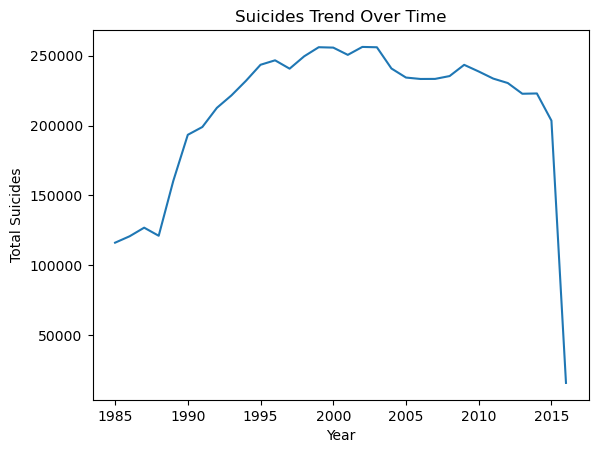

In [14]:
df.groupby('year')['suicides_no'].sum().plot()
plt.xlabel("Year")
plt.ylabel("Total Suicides")
plt.title("Suicides Trend Over Time")
plt.show()

#### Suicide rate by gender:

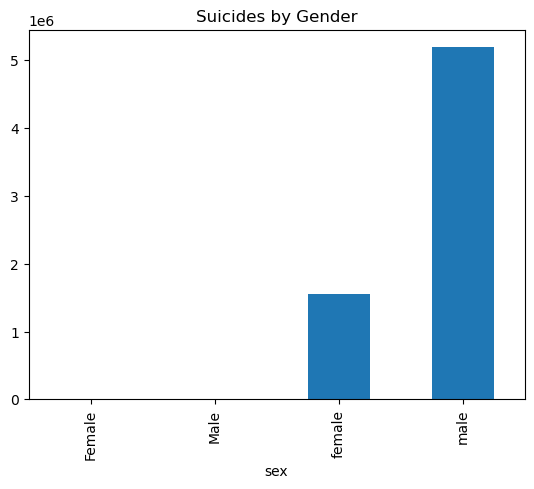

In [15]:
df.groupby('sex')['suicides_no'].sum().plot(kind='bar')
plt.title("Suicides by Gender")
plt.show()

#### GDP vs Suicide Rate scatter:

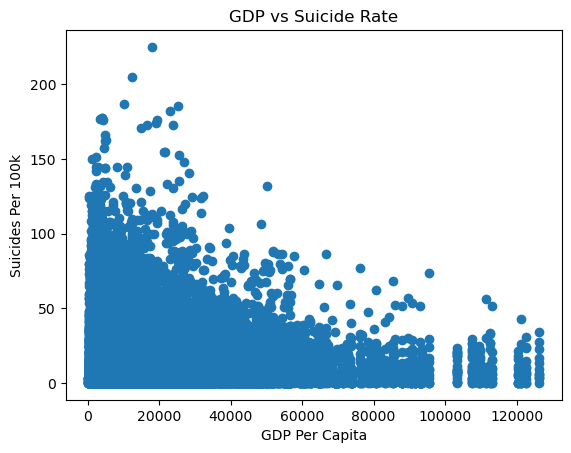

In [16]:
plt.scatter(df['gdp_per_capita ($)'], df['suicides/100k pop'])
plt.xlabel("GDP Per Capita")
plt.ylabel("Suicides Per 100k")
plt.title("GDP vs Suicide Rate")
plt.show()

### Feature Engineering

#### Select numeric columns for clustering/regression:

In [17]:
data = df[['suicides/100k pop','gdp_per_capita ($)','population','HDI for year']].copy()
data = data.fillna(data.mean())

#### Clustering (KMeans)

In [18]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

### Elbow method:

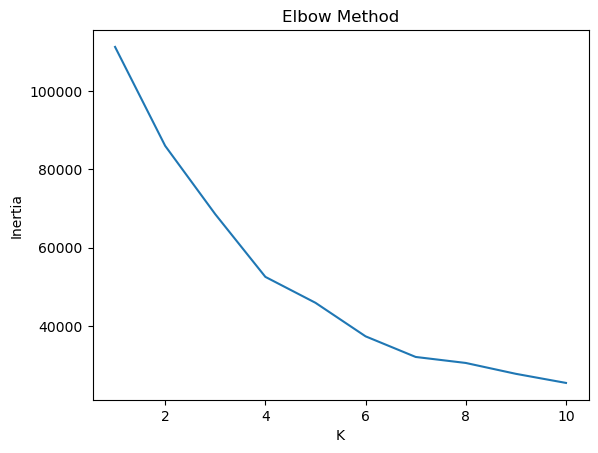

In [19]:
inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km.fit(scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

###  Correlation Heatmap

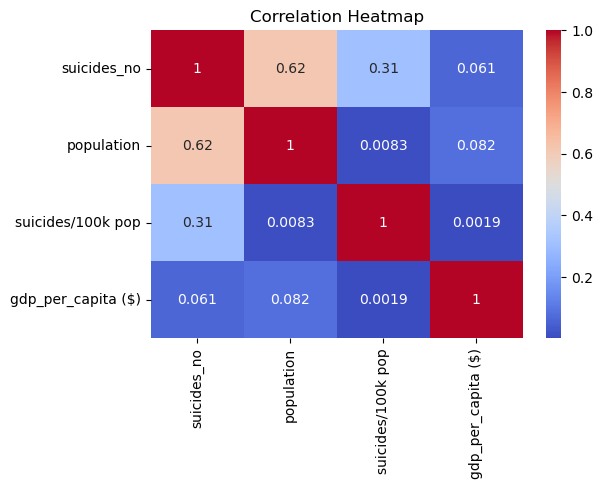

In [20]:
numeric_cols = ["suicides_no", "population", "suicides/100k pop", "gdp_per_capita ($)"]
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### Fix GDP formatting

In [21]:
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.replace(',', '').astype(float)


### Fix HDI (missing values)

In [22]:
df['HDI for year'] = df['HDI for year'].fillna(df['HDI for year'].median())


### Feature Engineering

In [23]:
# suicide rate recomputed
df['suicide_rate'] = df['suicides_no'] / df['population'] * 100000

# GDP per 1000 people
df['gdp_per_1000'] = df[' gdp_for_year ($) '] / (df['population'] / 1000)

# Age numeric
df['age_num'] = df['age'].str.extract('(\d+)').astype(int)


In [24]:
### Label Encoding Categorical Columns
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])
df['sex'] = le.fit_transform(df['sex'])
df['age'] = le.fit_transform(df['age'])
df['generation'] = le.fit_transform(df['generation'])


### Select Features for Best Accuracy

In [25]:
X = df[['population', 'gdp_per_capita ($)', 'HDI for year',
        'age_num', 'sex', 'generation', 'gdp_per_1000', 'suicide_rate']]
y = df['suicides_no']


### Train–Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Scaling

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Train Multiple Models + Compare Accuracy

In [28]:
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f" {name} ")
    print("R2 Score:", r2_score(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))


 LinearRegression 
R2 Score: 0.44467542988498876
RMSE: 679.6267750358929
 DecisionTree 
R2 Score: 0.9953836078922917
RMSE: 61.965274895294726
 RandomForest 
R2 Score: 0.997854724694576
RMSE: 42.241424220285275
 GradientBoosting 
R2 Score: 0.9930425769850406
RMSE: 76.07137048814779
